# Cocount Rhinoceros Beetle Pheromone Trap Catch at Leo Palace Resort from July 2019 through March 2020

Forty CRB pheromone traps (AlphaScents panel traps) were maintained at the Leo Palace Resort. Data were recorded using EpiCollect 5. Almost all of the traps were baited with oryctalure (ChemTica). These lures were replaced whenever liquid in the bubble pack was depleted. During two trapping periods, two experimental lures were tested, indol and squalene.

## Results

* During the surveillance period, the mean capture rate for oryctalure baited traps was 0.367 beetles per trap-day. This rate is more than an order of magnitude higher than capture rates measured on Guam throughout recent years.

* Mean capture rate for squaline baited traps 0.393 beetles per trap-day, equivalent to oryctalure. 

* Mean capture rate for indole was 0.025 beetles per trap-day.

## Data notes

### Assumptions

* The **created_at** field in the EpiCollect data is equivalent to the trap visit date (after converting from UTC to Ch

* The first trap visit for each trap occured 7 days after the trap was installed and baited.

* the trapping period, **trap_days**, started on the previous **trap_visit_date** for that trap.

* Lure types noted in the **notes** field indicate that the trap was baited with this lure on the trap visit date.

### Duplicate and missing records
```
2019-09-08 2 records for t10, 0 records for t8
2019-09-25 0 records for t15
2019-10-18 2 records for t26, 0 records for t25
2019-11-29 0 records for t18
2019-12-04 0 records for t3
2019-12-13 0 records for t33, 2 records for t34
2019-12-18 2 records for t37, 0 records for t38
2019-12-26 0 records for traps t1 through t33
2020-01-15 0 records for t27
2020-01-03 0 records for t11
2020-02-07 0 records for t9
2020-02-14 2 records for t25
2020-02-21 0 records for t19
2020-03-06 0 records for t13, 0 records for t14
```

### Outliers
 
2020-01-15 trap 36 caught 32 males and 1 female
**Changed this to 2 males and 1 female**

### Anomolous spike

2019-08-23 An anomolous spike is associated with the trap visit on this date. During the 2 day trap period, the mean capture rate was exceptionally high, 1.0375 beetles per trap-day. 

### Indole

2020-01-09 Trap 34 baited with indole; 1 males and 1 females trapped during 14 days
2020-02-07 20 traps baited with indole; 2 males and 2 females trapped during 8 days
**2020-01-09 record for trap 34 may be an error. Changed lure to oryctalure** in **cleaned2.csv**

### Squalene

2020-02-14 20 traps baited with squalene; 22 males and 33 females trapped over 7 days

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime
import seaborn as sns

In [58]:
# Read the EpiCollect CSV, select relevant columns, sort by timestamp, and add ChST date

df = pd.read_csv('leo-palace-traps.csv', parse_dates=['created_at'])
df = df.filter(['created_at','lat_1_GPS', 'long_1_GPS', '2_Panel_trap_number',  '3_Males_Trapped',
           '4_Females_trapped', '5_Note'])
df.sort_values(by=['created_at'], inplace=True)
df['created_at'] = df.created_at.dt.tz_convert('Pacific/Guam')
df['trap_visit_date'] = df.created_at.dt.strftime('%Y-%m-%d')
rawdatafile = 'rawdata.csv'
if os.path.exists(rawdatafile):
    print(f'{rawdatafile} already exists.')
else:
    print(f'writing {rawdatafile}')
    df.to_csv('rawdata.csv', index=False)
df

rawdata.csv already exists.


,created_at,lat_1_GPS,long_1_GPS,2_Panel_trap_number,3_Males_Trapped,4_Females_trapped,5_Note,trap_visit_date
1246,2019-07-03 10:21:26.910000+10:00,13.413890,144.738947,001,3,4,1 live male specimen,2019-07-03
1245,2019-07-03 10:24:58.290000+10:00,13.413877,144.738964,002,2,6,All dead,2019-07-03
1244,2019-07-03 10:31:37.096000+10:00,13.412856,144.739523,003,2,3,Deceased,2019-07-03
1243,2019-07-03 10:35:42.392000+10:00,13.412904,144.739554,004,3,1,1 live male,2019-07-03
1242,2019-07-03 10:37:08.097000+10:00,13.412532,144.739769,005,1,3,Deceased,2019-07-03
...,...,...,...,...,...,...,...,...
4,2020-03-13 17:23:47.358000+10:00,NaN,NaN,036 3/6/20,1,4,Chemtica Lure,2020-03-13
3,2020-03-13 17:24:36.340000+10:00,NaN,NaN,037 3/6/20,3,3,Chemtica Lure,2020-03-13
2,2020-03-13 17:25:07.652000+10:00,NaN,NaN,038 3/6/20,0,3,Chemtica Lure,2020-03-13
1,2020-03-13 17:25:40.486000+10:00,NaN,NaN,039 3/6/20,3,2,Chemtica Lure,2020-03-13


## At this point, data in **rawdata.csv** was cleaned using a spreadsheet. 

In [59]:
dfcleaned = pd.read_csv('cleaned_data.csv', parse_dates=True)
dfcleaned.sort_values(by=['trap_visit_date'], inplace=True)
dfcleaned

,created_at,lat,lon,trap_id,males,females,note,trap_visit_date
0,2019-07-03 10:21:26.910000+10:00,13.413890,144.738947,1,3,4,1 live male specimen,2019-07-03
23,2019-07-03 11:33:44.102000+10:00,13.411061,144.733294,24,1,2,1 live female,2019-07-03
22,2019-07-03 11:32:13.222000+10:00,13.411534,144.733272,23,0,3,Deceased,2019-07-03
21,2019-07-03 11:30:46.565000+10:00,13.412099,144.732985,22,2,1,1 live male,2019-07-03
20,2019-07-03 11:29:13.627000+10:00,13.412624,144.732955,21,0,0,NaN,2019-07-03
...,...,...,...,...,...,...,...,...
1192,2020-03-13 15:38:24.640000+10:00,NaN,NaN,24,2,0,Chemtica Lure,2020-03-13
1191,2020-03-13 15:37:36.625000+10:00,NaN,NaN,23,1,4,Chemtica Lure,2020-03-13
1190,2020-03-13 15:37:19.964000+10:00,NaN,NaN,22,0,0,Chemtica Lure,2020-03-13
1188,2020-03-13 15:36:46.831000+10:00,NaN,NaN,20,0,0,Chemtica Lure,2020-03-13


In [60]:
dfcleaned1 = dfcleaned.filter(['trap_visit_date', 'trap_id', 'note', 'males', 'females'])

In [61]:
def get_previous_trap_visit_date(row):
    """
    Returns the previous trap visit date for a trap. If a previous date cannot be found, None is returned.
    """
    boolean1 = dfcleaned1.trap_id==row.trap_id
    boolean2 = dfcleaned1.trap_visit_date<row.trap_visit_date
    if sum(boolean1 & boolean2)>0:
        return dfcleaned1['trap_visit_date'][boolean1 & boolean2].tail(1).values[0]
    else:
        return None

In [62]:
def get_previous_note(row):
    """
    Returns the previous note for a trap. If a previous note cannot be found, None is returned.
    The previous note facilitates filling in the new lure column.
    """
    boolean1 = dfcleaned1.trap_id==row.trap_id
    boolean2 = dfcleaned1.trap_visit_date<row.trap_visit_date
    if sum(boolean1 & boolean2)>0:
        return dfcleaned1['note'][boolean1 & boolean2].tail(1).values[0]
    else:
        return None

In [63]:
dfcleaned1['previous_trap_visit_date'] = dfcleaned1.apply(lambda row: get_previous_trap_visit_date(row), axis=1)
dfcleaned1['previous_note'] = dfcleaned1.apply(lambda row: get_previous_note(row), axis=1)
dfcleaned1

,trap_visit_date,trap_id,note,males,females,previous_trap_visit_date,previous_note
0,2019-07-03,1,1 live male specimen,3,4,None,None
23,2019-07-03,24,1 live female,1,2,None,None
22,2019-07-03,23,Deceased,0,3,None,None
21,2019-07-03,22,1 live male,2,1,None,None
20,2019-07-03,21,NaN,0,0,None,None
...,...,...,...,...,...,...,...
1192,2020-03-13,24,Chemtica Lure,2,0,2020-03-06,Chemtica Lure
1191,2020-03-13,23,Chemtica Lure,1,4,2020-03-06,Chemtica Lure
1190,2020-03-13,22,Chemtica Lure,0,0,2020-03-06,Chemtica Lure
1188,2020-03-13,20,Chemtica Lure,0,0,2020-03-06,Chemtica Lure


In [64]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [65]:
def get_trap_rate(row):
    if row.previous_trap_visit_date:
        return (row.males + row.females)/days_between(row.previous_trap_visit_date, row.trap_visit_date)        
    else:
        return None

In [66]:
dfcleaned1['trap_rate'] = dfcleaned1.apply(lambda row: get_trap_rate(row), axis=1)
dfcleaned1

,trap_visit_date,trap_id,note,males,females,previous_trap_visit_date,previous_note,trap_rate
0,2019-07-03,1,1 live male specimen,3,4,None,None,NaN
23,2019-07-03,24,1 live female,1,2,None,None,NaN
22,2019-07-03,23,Deceased,0,3,None,None,NaN
21,2019-07-03,22,1 live male,2,1,None,None,NaN
20,2019-07-03,21,NaN,0,0,None,None,NaN
...,...,...,...,...,...,...,...,...
1192,2020-03-13,24,Chemtica Lure,2,0,2020-03-06,Chemtica Lure,0.285714
1191,2020-03-13,23,Chemtica Lure,1,4,2020-03-06,Chemtica Lure,0.714286
1190,2020-03-13,22,Chemtica Lure,0,0,2020-03-06,Chemtica Lure,0.000000
1188,2020-03-13,20,Chemtica Lure,0,0,2020-03-06,Chemtica Lure,0.000000


In [67]:
f = 'cleaned1.csv'
if os.path.exists(f):
    print(f'{f} already exists - delete it to overwrite')
else:
    print(f'writing {f}')
    dfcleaned1.to_csv(f, index=False)

cleaned1.csv already exists - delete it to overwrite


## At this point **cleaned1.csv** is modified in a spreadsheet and saved as cleaned2.csv

In [68]:
dfcleaned2 = pd.read_csv('cleaned2.csv', parse_dates=['trap_visit_date', 'previous_trap_visit_date'])
dfcleaned2.dtypes

trap_visit_date             datetime64[ns]
trap_id                              int64
note                                object
males                                int64
females                              int64
previous_trap_visit_date    datetime64[ns]
previous_note                       object
lure                                object
trap_days                            int64
trap_rate                          float64
Unnamed: 10                        float64
Unnamed: 11                        float64
dtype: object

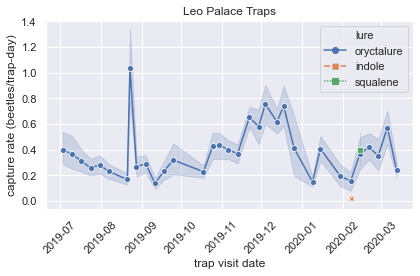

In [69]:
sns.set()
sns.lineplot(x='trap_visit_date', 
             y='trap_rate', 
             data=dfcleaned2,
             hue='lure',
             markers=True,
             style='lure')
plt.xticks(rotation=45)
plt.title('Leo Palace Traps')
plt.xlabel('trap visit date')
plt.ylabel('capture rate (beetles/trap-day)')
plt.tight_layout()
plt.savefig('trapcatch.pdf')

# Remove anomolous spike

An anomolous spike is associated with the 2019-08-23 trap visit data. During the preceeding 2 day trap period, the mean capture rate was exceptionally high, 1.0375 beetles per trap-day. This looks very much like a data problem. Data for the 2019-08-23 trap visit are removed before generating the following chart.

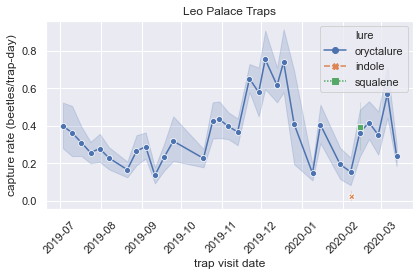

In [70]:
sns.set()
sns.lineplot(x='trap_visit_date', 
             y='trap_rate', 
             data=dfcleaned2[dfcleaned2.trap_visit_date!='2019-08-23'],
             hue='lure',
             markers=True,
             style='lure')
plt.xticks(rotation=45)
plt.title('Leo Palace Traps')
plt.xlabel('trap visit date')
plt.ylabel('capture rate (beetles/trap-day)')
plt.tight_layout()
plt.savefig('trapcatch1.pdf')

In [71]:
dfcleaned2[dfcleaned2.trap_visit_date!='2019-08-23'].groupby('lure')[['trap_rate']].mean()

,trap_rate
lure,
indole,0.025000
oryctalure,0.366716
squalene,0.392857
